In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 12s 1us/step


In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2977 - accuracy: 0.9134
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1436 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1070 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0879 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0736 - accuracy: 0.9767


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 2s 4ms/step - loss: 0.0738 - accuracy: 0.9778
Test accuracy: 97.78%


In [8]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 3ms/step


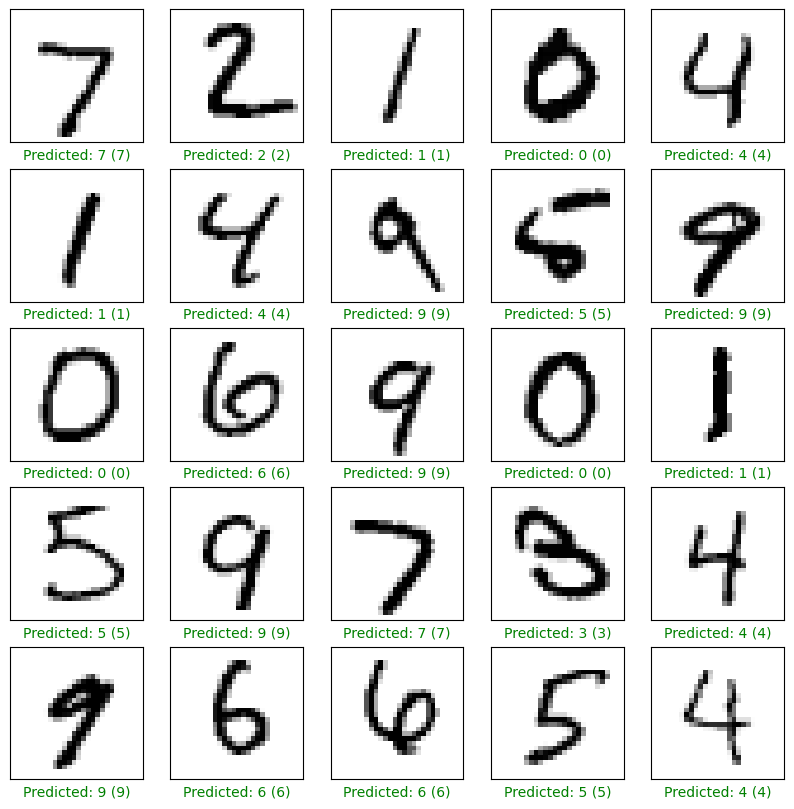

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = predictions[i].argmax()
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Predicted: {predicted_label} ({true_label})', color=color)

plt.show()

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

Epoch 1/5
1875/1875 [==============================] - 59s 30ms/step - loss: 0.1548 - accuracy: 0.9538
Epoch 2/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0530 - accuracy: 0.9840
Epoch 3/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0339 - accuracy: 0.9891
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0233 - accuracy: 0.9927
Epoch 5/5
313/313 [==============================] - 4s 10ms/step - loss: 0.0474 - accuracy: 0.9847
Test accuracy: 98.47%


In [13]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = y_train.astype('int32')

# Define the model
model = Sequential()
model.add(SimpleRNN(32, input_shape=(1, 28 * 28)))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train.reshape((60000, 1, 28 * 28)), y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test.reshape((10000, 1, 28 * 28)), y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.3623 - accuracy: 0.9011
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1994 - accuracy: 0.9427
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1601 - accuracy: 0.9540
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1360 - accuracy: 0.9601
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.1367 - accuracy: 0.9586
Test accuracy: 95.86%


In [15]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(14*14, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(7*7, activation='relu'))
model.add(Dense(14*14, activation='relu'))
model.add(Dense(28 * 28, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')
train_images = train_images.reshape((-1, 28 * 28))
model.fit(train_images, train_images, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 21s 10ms/step - loss: 0.1216
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0866
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0817
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0797
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0784


In [20]:
from keras.layers import Flatten, Dense, Dropout, Reshape, SimpleRNN

def DNN():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def RNN():
    model = Sequential()
    model.add(Reshape((1, 28 * 28), input_shape=(28, 28)))
    model.add(SimpleRNN(32))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Train and evaluate the models
models = [DNN(), RNN()]
model_names = ['DNN', 'RNN']
accuracies = []
for i, model in enumerate(models):
    model.fit(x_train, y_train, epochs=5)
    _, accuracy = model.evaluate(x_test, y_test)
    accuracies.append(accuracy)
    print(f'Model {model_names[i]} accuracy: {accuracy * 100:.2f}%')

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2961 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1398 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1077 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0876 - accuracy: 0.9731
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.0770 - accuracy: 0.9775
Model DNN accuracy: 97.75%
Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.3653 - accuracy: 0.9007
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1971 - accuracy: 0.9430
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1555 - accuracy: 0.9552
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1310 - accuracy: 0.9634
Epoch 5/5
313/313 [==============================] - 2s 4m

In [21]:
# Compare the models
print(f'DNN accuracy: {accuracies[0] * 100:.2f}%')
print(f'RNN accuracy: {accuracies[1] * 100:.2f}%')

if accuracies[0] > accuracies[1]:
    print('DNN has a higher accuracy than RNN.')
elif accuracies[0] < accuracies[1]:
    print('RNN has a higher accuracy than DNN.')
else:
    print('Both models have the same accuracy.')

DNN accuracy: 97.75%
RNN accuracy: 96.01%
DNN has a higher accuracy than RNN.


In [22]:
from keras.layers import Flatten, Dense, Dropout, Reshape, SimpleRNN, Conv2D, MaxPooling2D

def DNN():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def RNN():
    model = Sequential()
    model.add(Reshape((1, 28 * 28), input_shape=(28, 28)))
    model.add(SimpleRNN(32))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def CNN():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Train and evaluate the models
models = [DNN(), RNN(), CNN()]
model_names = ['DNN', 'RNN', 'CNN']
accuracies = []
for i, model in enumerate(models):
    model.fit(x_train, y_train, epochs=5)
    _, accuracy = model.evaluate(x_test, y_test)
    accuracies.append(accuracy)
    print(f'Model {model_names[i]} accuracy: {accuracy * 100:.2f}%')

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2953 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1426 - accuracy: 0.9573
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1068 - accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0894 - accuracy: 0.9729
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.0744 - accuracy: 0.9757
Model DNN accuracy: 97.57%
Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.3666 - accuracy: 0.9008
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1992 - accuracy: 0.9436
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1581 - accuracy: 0.9542
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1334 - accuracy: 0.9614
Epoch 5/5
313/313 [==============================] - 2s 4m

In [23]:
# Compare the models
print(f'DNN accuracy: {accuracies[0] * 100:.2f}%')
print(f'RNN accuracy: {accuracies[1] * 100:.2f}%')
print(f'CNN accuracy: {accuracies[2] * 100:.2f}%')

if accuracies[0] > accuracies[1] and accuracies[0] > accuracies[2]:
    print('DNN has the highest accuracy.')
elif accuracies[1] > accuracies[0] and accuracies[1] > accuracies[2]:
    print('RNN has the highest accuracy.')
elif accuracies[2] > accuracies[0] and accuracies[2] > accuracies[1]:
    print('CNN has the highest accuracy.')
else:
    print('Multiple models have the same highest accuracy.')

DNN accuracy: 97.57%
RNN accuracy: 95.80%
CNN accuracy: 98.75%
CNN has the highest accuracy.


In [28]:
# Compare the models
print(f'DNN accuracy: {accuracies[0] * 100:.2f}%')
print(f'RNN accuracy: {accuracies[1] * 100:.2f}%')
print(f'CNN accuracy: {accuracies[2] * 100:.2f}%')

if accuracies[0] > accuracies[1] and accuracies[0] > accuracies[2]:
    print('DNN has the highest accuracy.')
elif accuracies[1] > accuracies[0] and accuracies[1] > accuracies[2]:
    print('RNN has the highest accuracy.')
elif accuracies[2] > accuracies[0] and accuracies[2] > accuracies[1]:
    print('CNN has the highest accuracy.')
else:
    print('Multiple models have the same highest accuracy.')


DNN accuracy: 97.57%
RNN accuracy: 95.80%
CNN accuracy: 98.75%
CNN has the highest accuracy.


313/313 [==============================] - 1s 4ms/step


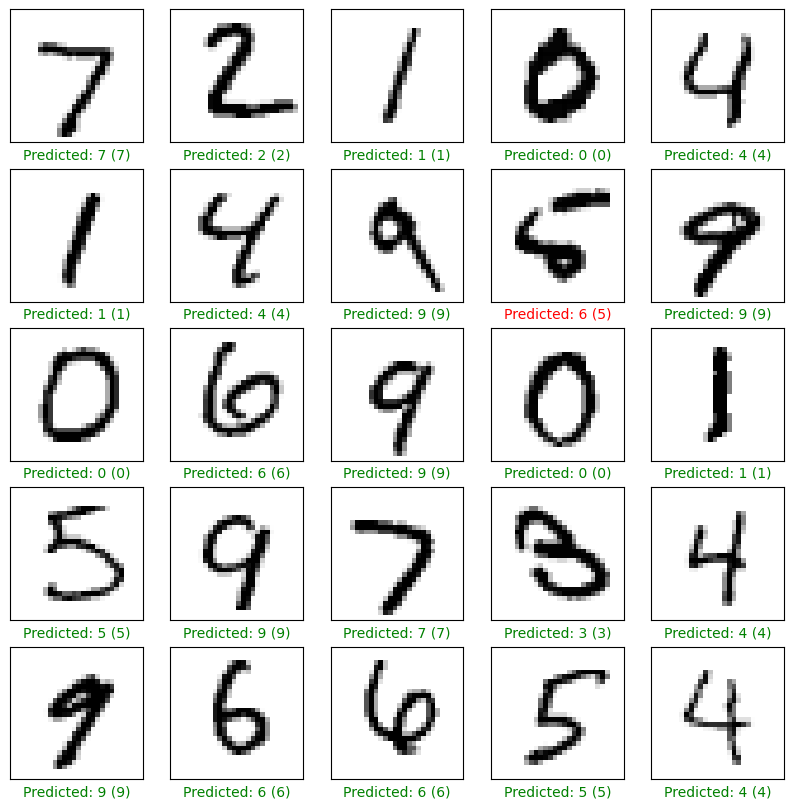

In [27]:
# Visualize the predictions
test_loss, test_acc = models[0].evaluate(test_images, test_labels)
predictions = models[0].predict(test_images)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = predictions[i].argmax()
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Predicted: {predicted_label} ({true_label})', color=color)

plt.show()